In [1]:
import pandas as pd
import numpy as np
import sklearn
import re
import wordcloud
from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer  
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
df = pd.read_csv("reviews_clean.csv")

In [30]:
df.shape

(864537, 4)

In [11]:
df_raw = pd.read_csv("review_select.csv")

In [12]:
df_raw.shape

(864537, 5)

In [31]:
df["label"] = df_raw["label"]

In [32]:
df.head()

,Unnamed: 0,text,stars,label
0,0,first admit not excite go la tavolta food snob...,4.0,Positive
1,1,walk around friday afternoon sit table bar wal...,1.0,Negative
2,2,not really find anything wrong place pastas pi...,5.0,Positive
3,3,great lunch today staff helpful assist selecti...,4.0,Positive
4,4,good selection class beers mains twice first t...,3.0,Negative


In [33]:
df_positive = df.iloc[:,:][df["label"]=="Positive"]
df_negative = df.iloc[:,:][df["label"]=="Negative"]
print("The number of positive reviews is %d. The number of negative reviews is %d."%(df_positive.shape[0],df_negative.shape[0]))

The number of positive reviews is 539469. The number of negative reviews is 325068.


In [34]:
df_positive.to_csv("cleaned_review_pos.csv")
df_negative.to_csv("cleaned_review_neg.csv")

In [38]:
df = df.sort_values(by = "label")

In [39]:
df.head()

,Unnamed: 0,text,stars,label
266546,266546,find great little pizza place glad near house ...,3.0,Negative
313341,313341,part large group food service ok think odd thr...,3.0,Negative
667740,667740,not come hurry lunch break stand counter min s...,2.0,Negative
313339,313339,order burgers friends feel apart buffalo fry t...,2.0,Negative
313336,313336,con extra fro sprinkle machine show total bill...,1.0,Negative


In [35]:
def feature_extraction(data, vec_type= "tfidf", stopwords = "english" , ngram_range = (2,2), max_features= None ):
    if vec_type == "bow":
        from sklearn.feature_extraction.text import CountVectorizer
        vectorizer = CountVectorizer( stop_words = stopwords, ngram_range = ngram_range, max_features = max_features)
        vec = vectorizer.fit_transform(data)
    if vec_type =="tfidf":
        from sklearn.feature_extraction.text import TfidfVectorizer
        vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words = stopwords, ngram_range= ngram_range, max_features = max_features)
        vec = vectorizer.fit_transform(data)        
#     if vec_type == "word2vec":
# 
    return (vectorizer,vec)

In [30]:
# # positive tfidf 1-gram 10000features
# # choose 10000 features to reduce the time for calculating the weight for wordcloud
# text = df_positive["text"]
# feature = feature_extraction(text,vec_type = "tfidf",ngram_range = (1,1),max_features = 10000)
# X = feature[1]
# vectorizer = feature[0]

In [43]:
num_withna = df.shape[0]
df = df.iloc[:,:][-df["text"].isnull()]
print("Remove %d Na reviews"%(num_withna - df.shape[0]))

Remove 7 Na reviews


In [48]:
df_positive = df.iloc[:,:][df["label"]=="Positive"]
df_negative = df.iloc[:,:][df["label"]=="Negative"]
print("The number of positive reviews is %d. The number of negative reviews is %d."%(df_positive.shape[0],df_negative.shape[0]))

The number of positive reviews is 539468. The number of negative reviews is 325062.


In [54]:
df.iloc[325061:325065,:]

,Unnamed: 0,text,stars,label
167305,167305,first time location come lunch go order place ...,2.0,Negative
820819,820819,great food service really like atmosphere well...,5.0,Positive
595258,595258,southern california say not order something ge...,5.0,Positive
600049,600049,goto burger place toronto love different kinds...,5.0,Positive


In [44]:
# positive tfidf 1-gram 10000features
# choose 10000 features to reduce the time for calculating the weight for wordcloud
text = df["text"]
feature = feature_extraction(text,vec_type = "tfidf",ngram_range = (1,1),max_features = 10000)
X = feature[1]
vectorizer = feature[0]

In [59]:
X_neg = X[:325062,:]

In [55]:
X_pos = X[325062:,:]

In [56]:
def freq_calculator(X,vectorizer):
    freq = [(word, X.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]
    freq_dict = {}
    for i in range(len(freq)):
        freq_dict[freq[i][0]] = freq[i][1]
    return(freq_dict)

In [3]:
freq_dict = freq_calculator(X_pos,vectorizer)

In [48]:
freq_df = pd.DataFrame(freq_dict.items(),columns = ["word","weight"])
freq_df.to_csv("freq_pos_tfidf_1-gram_10000.csv")

In [49]:
freq_df.head()

,word,weight
0,ll,4357.122704
1,admit,421.943955
2,wa,28019.147814
3,excit,1047.122791
4,la,2227.058395


In [43]:
freq_df.to_csv("freq_pos_tfidf_1-gram_10000.csv")

In [33]:
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt
# w = WordCloud( background_color="white",width=6000,height=6000,max_words=1000).fit_words(freq_dict)
# plt.imshow(w)
# plt.figure(1,figsize=(13, 13))
# plt.axis('off')
# plt.show()

<Figure size 640x480 with 1 Axes>

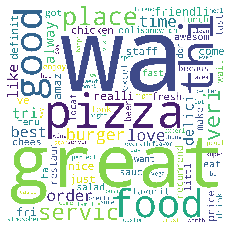

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
w = WordCloud( background_color="white",width=6000,height=6000,max_words=100).generate_from_frequencies(freq_dict)
plt.imshow(w)
plt.figure(1,figsize=(13, 13))
plt.axis('off')
plt.show()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
w = WordCloud( background_color="white",width=2500,height=2500).generate_from_frequencies(freq_dict)
plt.imshow(w)
plt.figure(1,figsize=(20, 20))
plt.axis('off')
plt.show()

In [121]:
from sklearn.feature_selection import chi2

In [140]:
# y = data.iloc[799990:800010,:][0]
# X = data.iloc

In [148]:
chisq_score = chi2(X,label)[0]

In [149]:
chisq_score

array([0.20100756, 0.53033009, 0.20100756, 0.53033009, 0.47140452,
       0.8660254 , 0.20100756, 0.20100756, 0.20100756, 0.20100756,
       0.53033009, 0.25197632, 0.8660254 , 0.20100756, 0.20100756,
       0.8660254 , 0.53033009, 0.53033009, 0.47140452, 0.53033009,
       0.25197632, 0.53033009, 0.25197632, 0.20100756, 0.20100756,
       0.25197632, 0.53033009, 0.25197632, 0.20100756, 0.25197632,
       0.25197632])

In [166]:
name_score =  zip(vectorizer.get_feature_names(), chisq_score)

In [167]:
zip(*sorted(name_score, key=lambda x:x[1])[-10:])

TypeError: 'zip' object is not subscriptable